In [2]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np 

In [4]:
class Jacobi:
  def __init__(self, x, A, b, tolerance, maxIterations):
    self.x = x
    self.A = A
    self.b = b
    self.tolerance = tolerance
    self.maxIterations = maxIterations

  def jacobi(self):
    iter = 0
    # Diagonal matrix
    D = np.diag(self.A)

    # Lower diagonal matrix
    L = np.tril(self.A, -1)

    # Upper diagonal matrix
    U = np.triu(self.A, 1)

    # Check whether there is a 0.0 in the diagonal of A
    if 0.0 in D:
      # If so, the jacobi method will not converge
      return np.array([np.NAN]), iter

    # D^-1
    inverseD = np.diag(1/D)

    # -D^-1(L+U)
    B = np.asmatrix(-inverseD) * np.asmatrix(L + U)

    # D^-1b
    C = np.asmatrix(inverseD) * np.asmatrix(self.b)

    # x will initially be a vector with random values
    x = np.random.uniform(size=(np.size(self.b), 1))

    # The new vector x(newX) will be x0(the initial x guess) 
    newX = self.x

    # List of local errors
    # Calculate the infinite norm error value of the initial guess x(x0) and the random vector x
    localErrors = [np.linalg.norm(newX - x, np.inf)]

    # List of x solutions
    xSolutions = [self.x]

    # Start time
    startTime = time.time()

    while iter < self.maxIterations and localErrors[iter] > self.tolerance:
      
      x = newX
      iter += 1
      # Calculate a new x solution
      newX = np.asmatrix(B) * np.asmatrix(x) + np.asmatrix(C)

      # Add the local error to the localErros list
      localErrors.append(np.linalg.norm(newX - x, np.inf))

      # Add the new x solution to the the xSolutions list
      xSolutions.append(newX)
      
    x = newX
    xSolutions.append(x)

    # End time
    endTime = time.time()
    print(f'Completed at {endTime - startTime} \n')

    return xSolutions, iter, localErrors, x

  # Plot the local erros
  def plotError(self, error):
    figure = plt.figure(1)
    plt.title("Error")
    plt.plot(error[1:])
    plt.grid()
    plt.show()



Completed at 0.0015048980712890625 

X Solutions: 
[0.][0.][0.]
[[1.]][[0.57142857]][[1.33333333]]
[[1.0952381]][[1.0952381]][[1.04761905]]
[[0.99404762]][[1.02721088]][[0.96825397]]
[[0.99263039]][[0.99007937]][[0.99829932]]
[[1.00102749]][[0.99846129]][[1.00273998]]
[[1.00053484]][[1.00092964]][[0.99994264]]
[[0.99987662]][[1.00006002]][[0.99977785]]
[[0.99996473]][[0.9999189]][[1.00002075]]
[[1.00001273]][[1.00000089]][[1.00001685]]
[[1.00000199]][[1.00000663]][[0.99999707]]
[[0.9999988]][[0.99999945]][[0.99999882]]
[[0.99999992]][[0.99999949]][[1.00000033]]
[[1.0000001]][[1.00000008]][[1.00000007]]
[[1.]][[1.00000004]][[0.99999997]]
[[0.99999999]][[0.99999999]][[1.]]
[[1.]][[1.]][[1.]]
[[1.]][[1.]][[1.]]
The solution to Ax=b is [[1.]
 [1.]
 [1.]]
The maximum iteration for the jacobi method is 16
The error is 9.243246834600427e-09


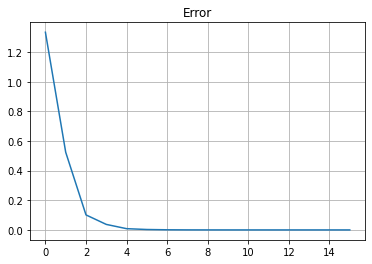

In [6]:
# A matrix
A = np.array([
    [8, 1, -1],
    [1, -7, 2],
    [2, 1, 9]
])

# Tolerance value
tolerance = 1e-8

# Initial x vector
initialX = np.array([0., 0., 0.])
initialX = initialX[:, np.newaxis]

# b vector
b = np.array([8, -4, 12])
b = b[:, np.newaxis]

jacobi = Jacobi(initialX, A, b, tolerance, 20)
xSolutions, iter, errors, X = jacobi.jacobi()

# Print all the solutions for every iteration
print("X Solutions: ")
# For every x solution
for x in xSolutions:
  # For every element in the x solution
  for elem in x:
    print(f'{elem}', end="")
  print()

# Print the solution to the Ax=b
print(f'The solution to Ax=b is {X}')

# Print the maximum iteration the jacobi method has reached
print(f'The maximum iteration for the jacobi method is {iter}')

# Print the error
print(f'The error is {errors[-1]}')

# Graph the errors
jacobi.plotError(errors)